# Task 2 :

**Predictive modeling of customer bookings**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
booking_df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [3]:
booking_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Data Information and Description :

In [4]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
booking_df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
#Number of Passengers
booking_df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [7]:
booking_df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [8]:
booking_df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [9]:
booking_df['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [10]:
booking_df['booking_origin'].unique() #drop

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [11]:
booking_df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

# EDA :

<AxesSubplot:xlabel='num_passengers', ylabel='count'>

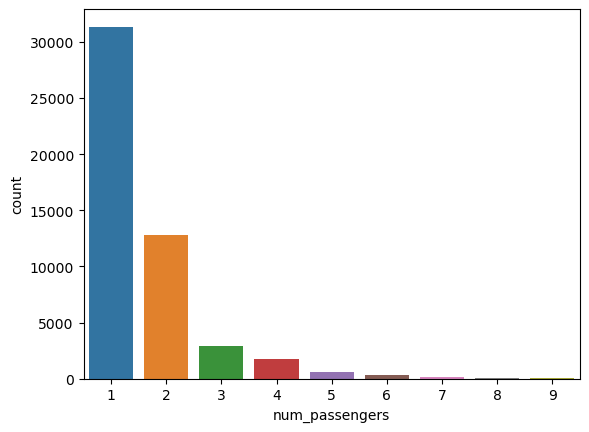

In [12]:
sns.countplot(booking_df['num_passengers'])

<AxesSubplot:xlabel='trip_type', ylabel='count'>

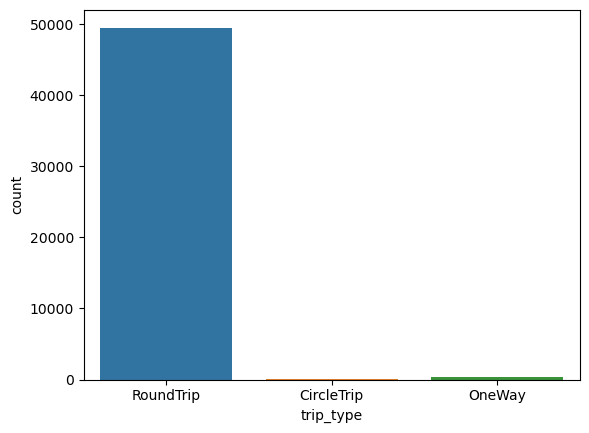

In [13]:
sns.countplot(booking_df['trip_type'])

<AxesSubplot:xlabel='flight_day', ylabel='count'>

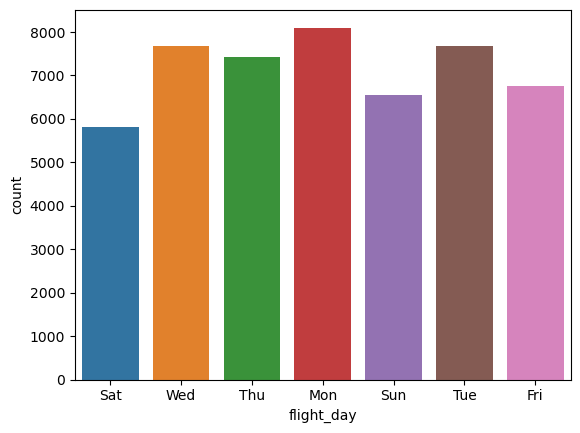

In [14]:
sns.countplot(booking_df['flight_day'])

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='wants_preferred_seat'>

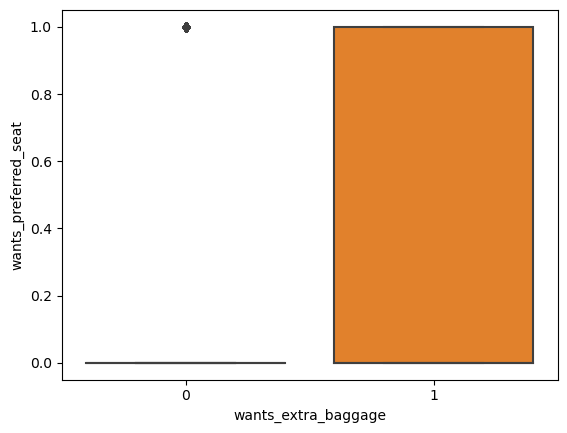

In [15]:
sns.boxplot(data = booking_df, x = 'wants_extra_baggage', y = 'wants_preferred_seat')

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

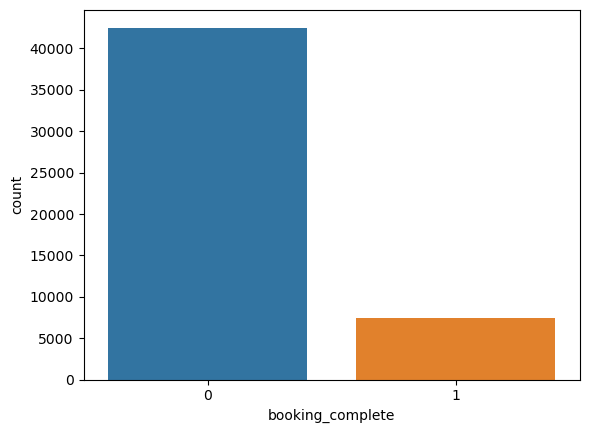

In [16]:
sns.countplot(booking_df['booking_complete'])

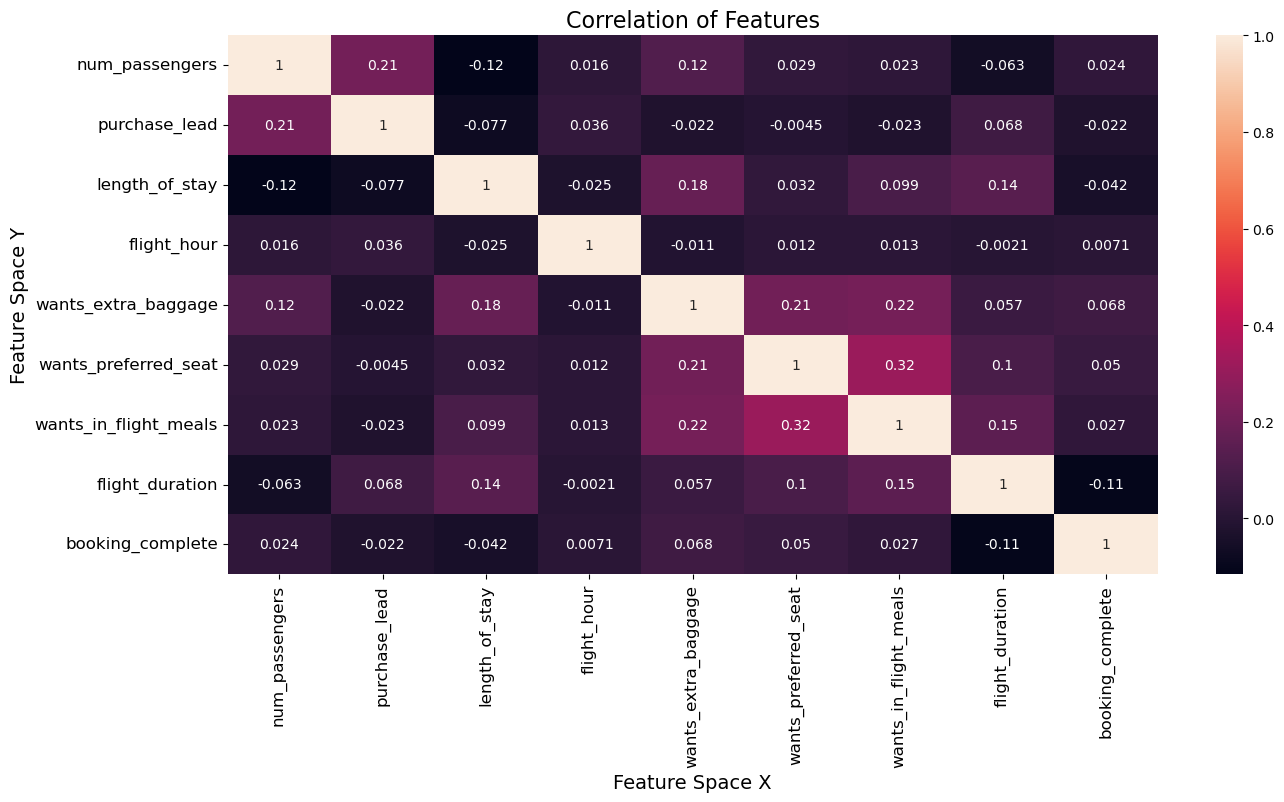

In [17]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=booking_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

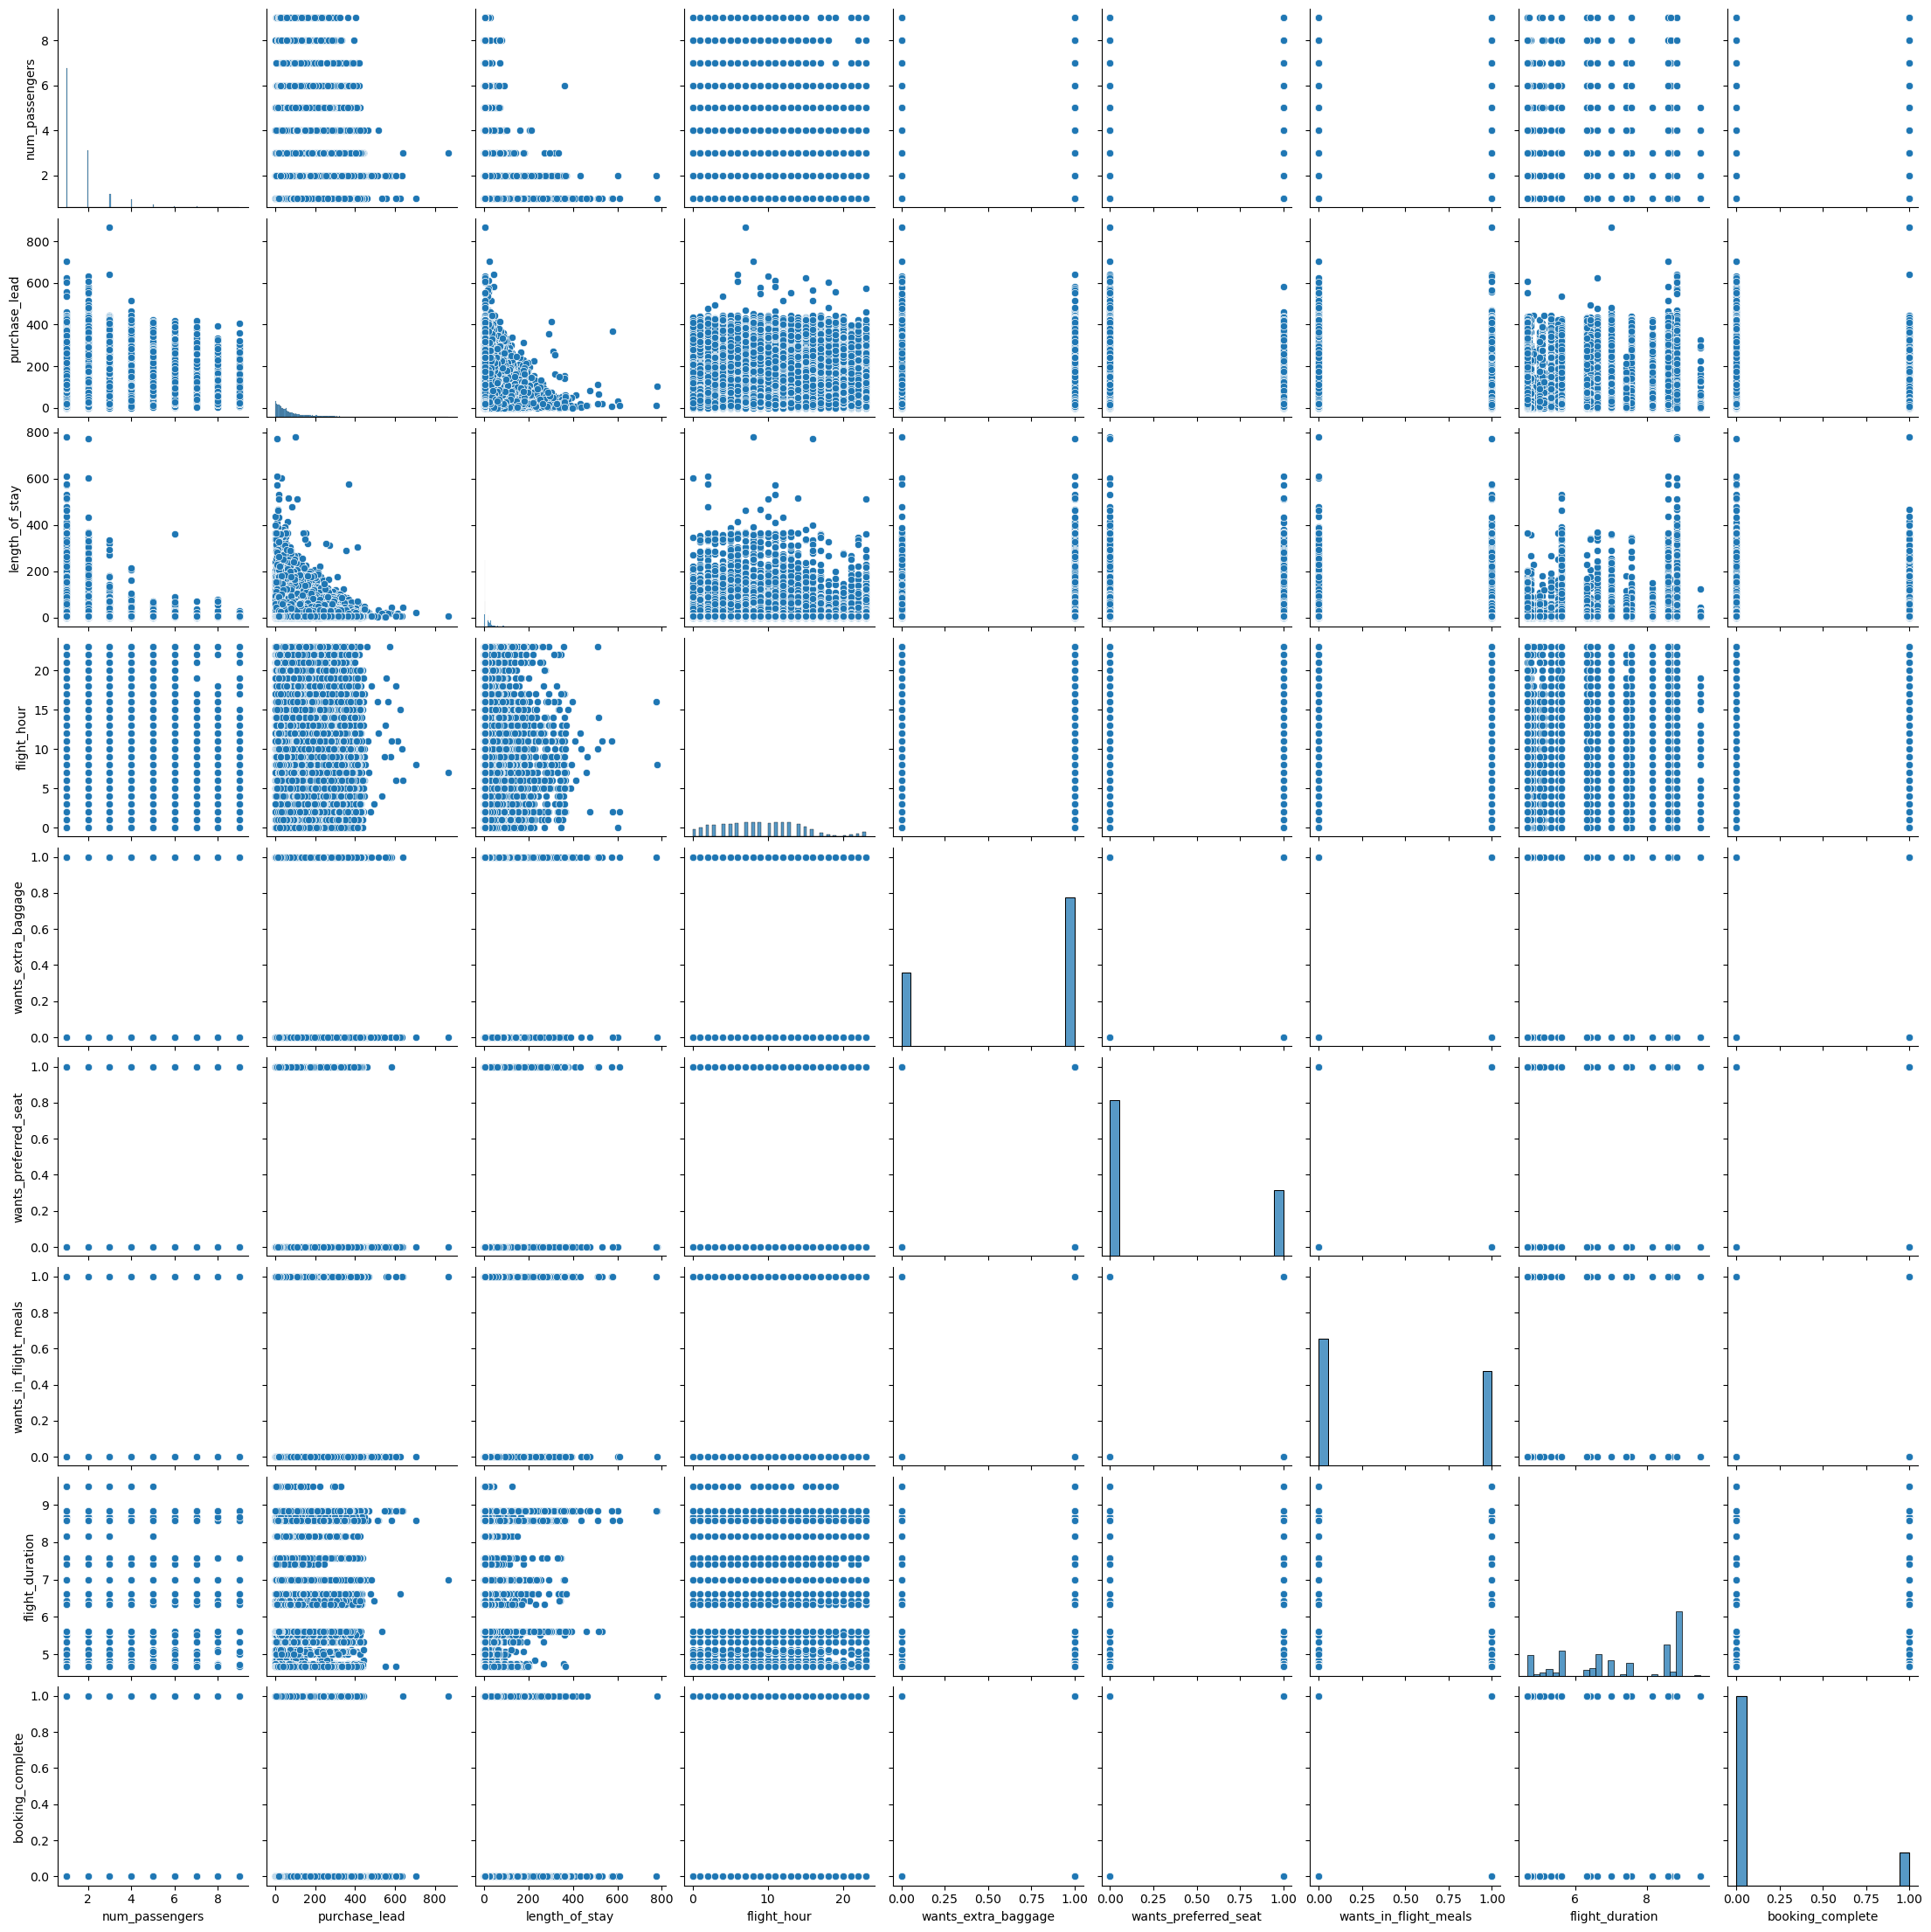

In [18]:
sns.pairplot(booking_df)

In [19]:
booking_df['route'].unique() #drop

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [20]:
#Dropping the columns which are not required for our modelling
booking_df.drop(['route', 'booking_origin', 'flight_day', 'trip_type'], axis = 1, inplace = True)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
booking_df['sales_channel'] = encoder.fit_transform(booking_df['sales_channel'])

In [23]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   purchase_lead          50000 non-null  int64  
 3   length_of_stay         50000 non-null  int64  
 4   flight_hour            50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 3.6 MB


num_passengers


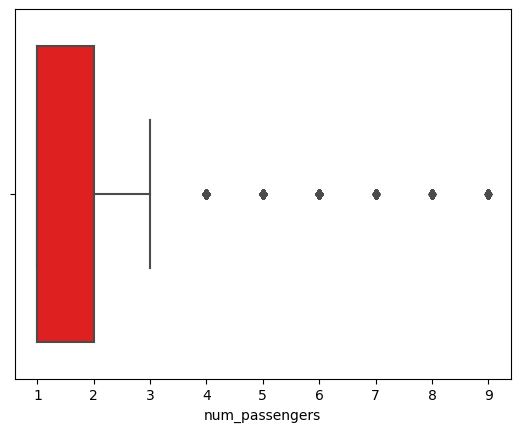

sales_channel


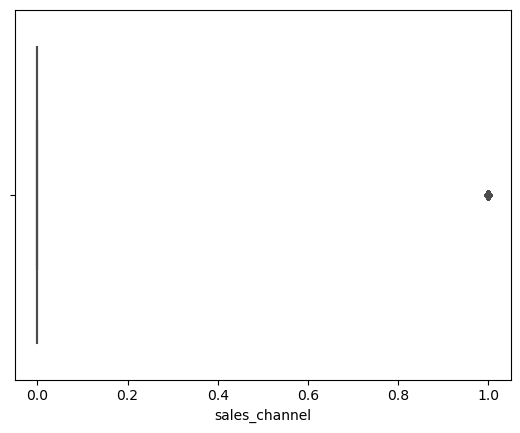

purchase_lead


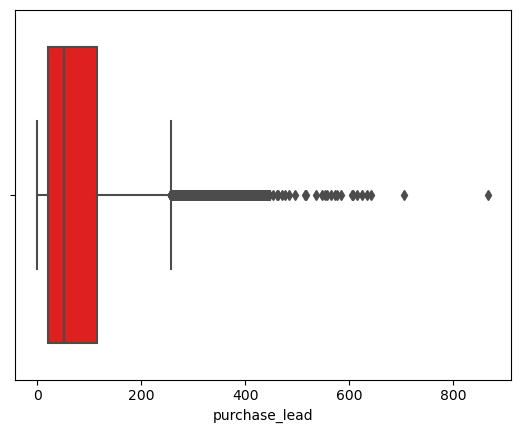

length_of_stay


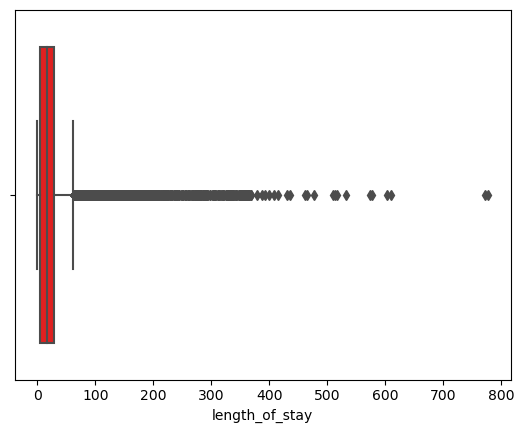

flight_hour


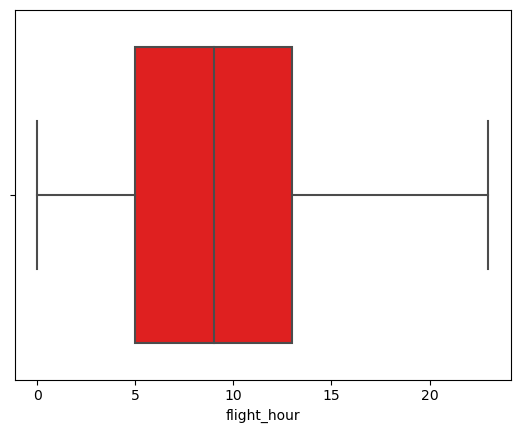

wants_extra_baggage


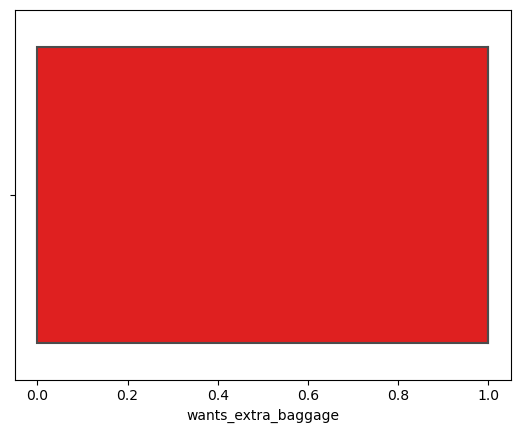

wants_preferred_seat


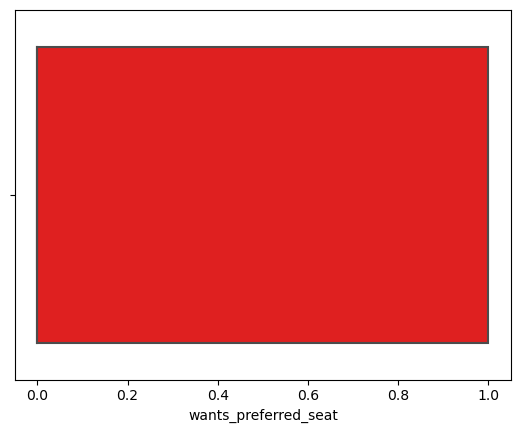

wants_in_flight_meals


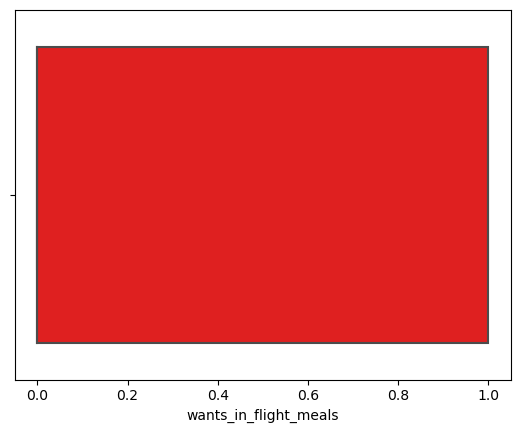

flight_duration


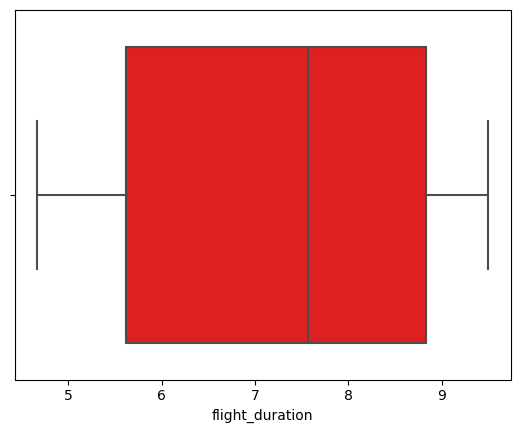

booking_complete


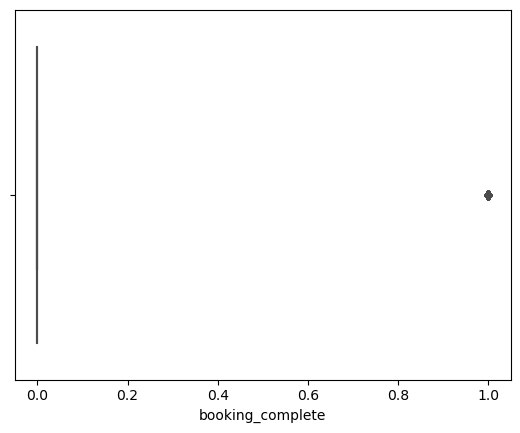

In [24]:
for col in booking_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = booking_df[col], data = booking_df, color = 'red')
    plt.show()

In [25]:
def get_bounds(booking_df, col):
    Q1 = booking_df[col].quantile(0.25)
    Q3 = booking_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [26]:
num_col = ['num_passengers', 'purchase_lead', 'length_of_stay']

In [27]:
for col in num_col:
    Upper, Lower = get_bounds(booking_df, col)
    booking_df[col] = np.where(booking_df[col]>Upper, Upper, booking_df[col])
    booking_df[col] = np.where(booking_df[col]<Lower, Lower, booking_df[col])

num_passengers


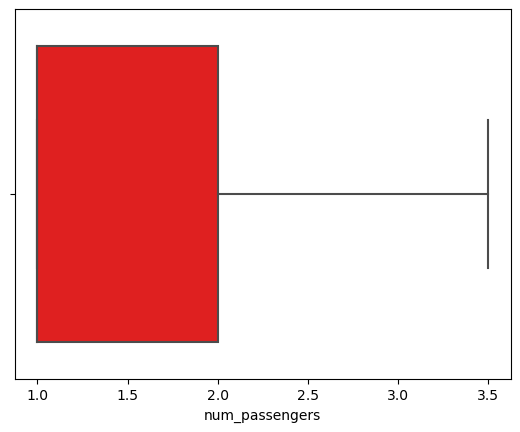

sales_channel


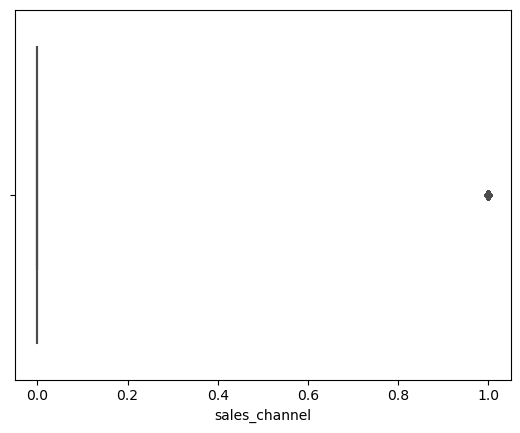

purchase_lead


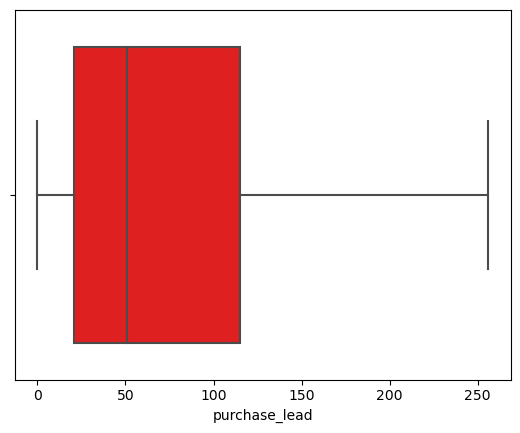

length_of_stay


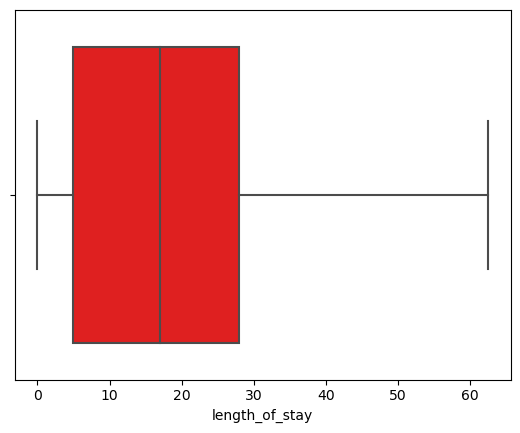

flight_hour


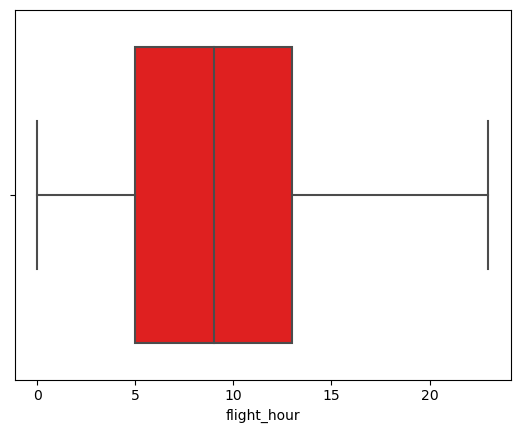

wants_extra_baggage


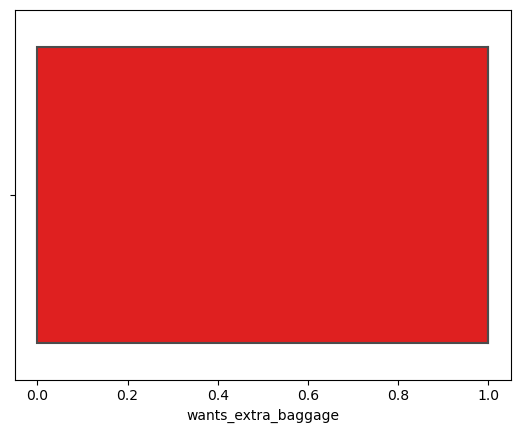

wants_preferred_seat


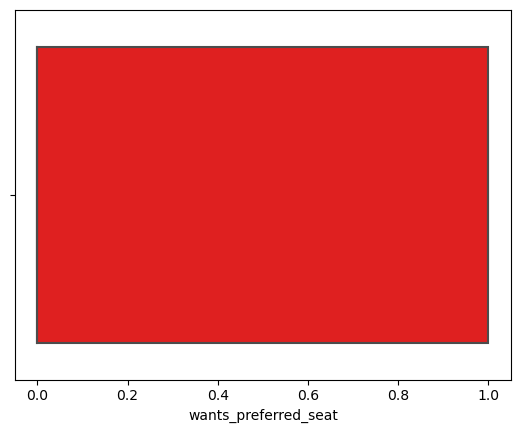

wants_in_flight_meals


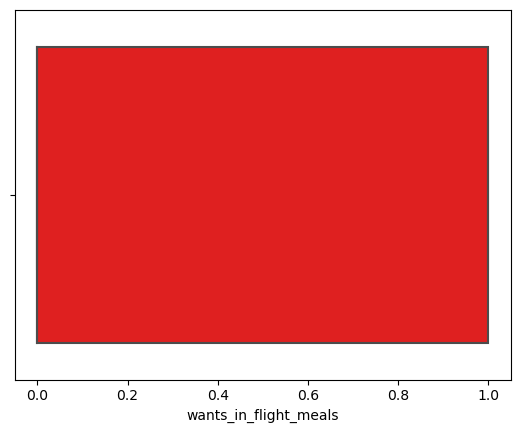

flight_duration


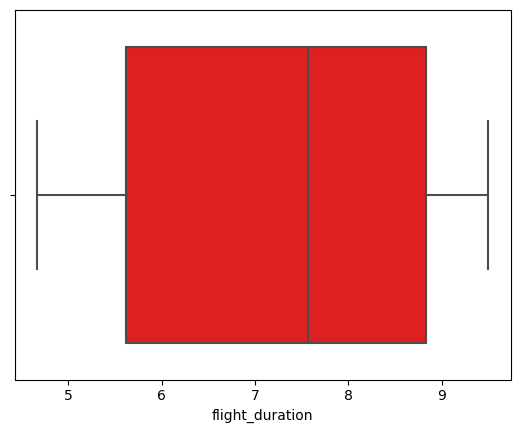

booking_complete


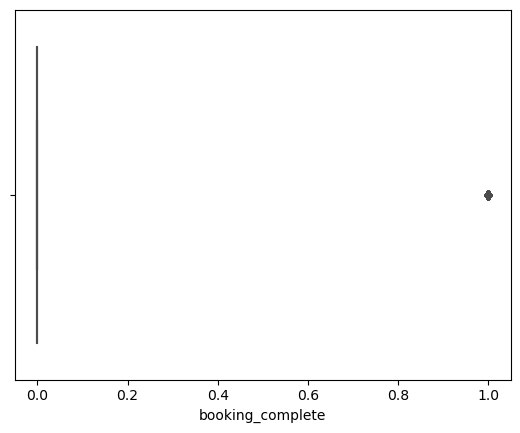

In [28]:
for col in booking_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = booking_df[col], data = booking_df, color = 'red')
    plt.show()

In [29]:
booking_df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,0,256.0,19.0,7,1,0,0,5.52,0
1,1.0,0,112.0,20.0,3,0,0,0,5.52,0
2,2.0,0,243.0,22.0,17,1,1,0,5.52,0
3,1.0,0,96.0,31.0,4,0,0,1,5.52,0
4,2.0,0,68.0,22.0,15,1,0,1,5.52,0


# Train-Test Split :

In [30]:
x = booking_df.drop('booking_complete', axis = 1)
y = booking_df['booking_complete']

In [31]:
x

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2.0,0,256.0,19.0,7,1,0,0,5.52
1,1.0,0,112.0,20.0,3,0,0,0,5.52
2,2.0,0,243.0,22.0,17,1,1,0,5.52
3,1.0,0,96.0,31.0,4,0,0,1,5.52
4,2.0,0,68.0,22.0,15,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...
49995,2.0,0,27.0,6.0,9,1,0,1,5.62
49996,1.0,0,111.0,6.0,4,0,0,0,5.62
49997,1.0,0,24.0,6.0,22,0,0,1,5.62
49998,1.0,0,15.0,6.0,11,1,0,1,5.62


In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

# Using SMOTE :

As we have seen in the **target column**, one feature is **sparse** and other feature is **dense** by using **SMOTE** we can add some synthetic data to make the sparse feature equal to the dense feature which will help to improve predictions.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

In [34]:
x_res, y_res = sm.fit_resample(x, y)

In [35]:
y_res.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split


x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res,y_res, test_size =0.20, random_state = 42)

In [37]:
print(x_train_res.shape)
print(x_test_res.shape)
print(y_train_res.shape)
print(y_test_res.shape)

(68035, 9)
(17009, 9)
(68035,)
(17009,)


# Freature Selection :

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x_res, y_res)

selected_feat = x_res.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 5
Threshold set by Model: 0.11
Important Features: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']


# Feature Importance :

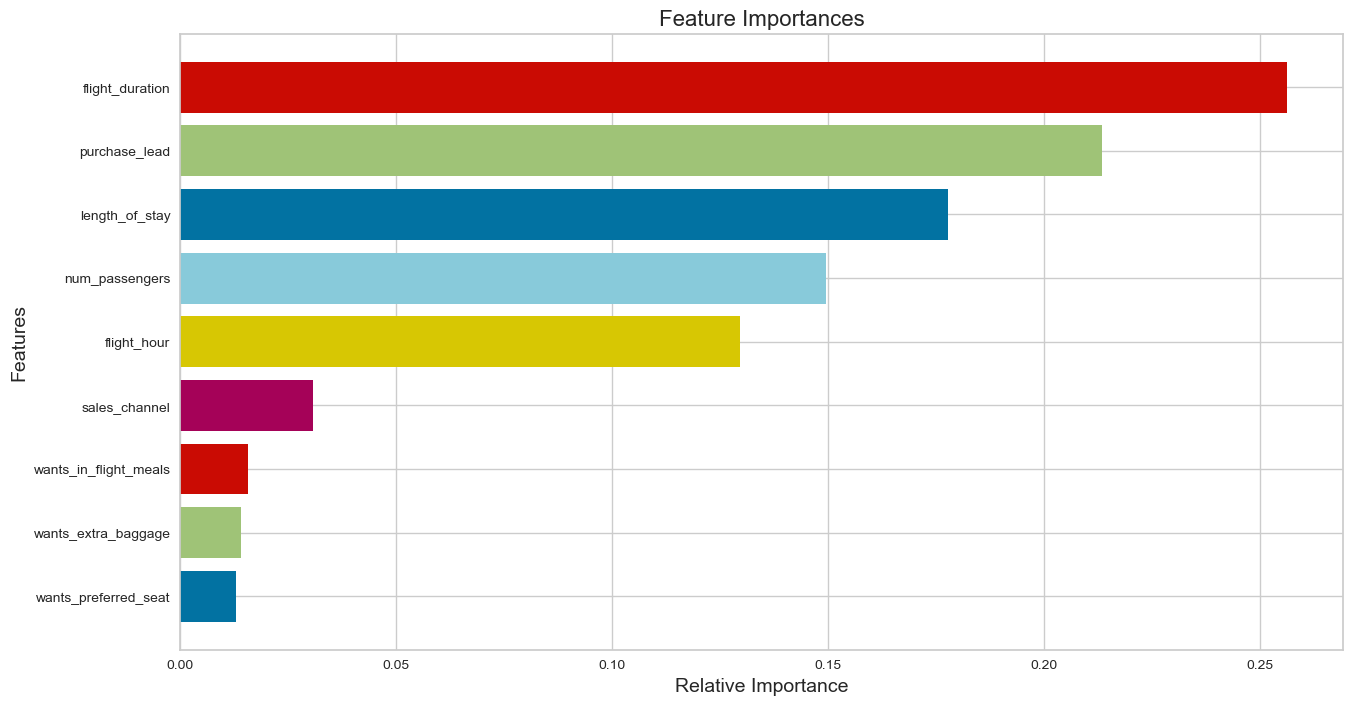

In [39]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x_res, y_res)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

In [40]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

# 1. Logistic Regression :

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 20)
log_reg.fit(x_train_res, y_train_res)

LogisticRegression(random_state=20)

In [42]:
y_pred_train = log_reg.predict(x_train_res)
y_pred_test = log_reg.predict(x_test_res)

**Model Evaluation :**

In [43]:
def modelEval(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [44]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_train)

                    Training Report           
The accuracy of the Model is : 0.6168148746968473
              precision    recall  f1-score   support

           0       0.64      0.55      0.59     34078
           1       0.60      0.68      0.64     33957

    accuracy                           0.62     68035
   macro avg       0.62      0.62      0.62     68035
weighted avg       0.62      0.62      0.62     68035



In [45]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_test)

               Testing Report                            
The accuracy of the Model is : 0.6211417484860956
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      8444
           1       0.61      0.69      0.65      8565

    accuracy                           0.62     17009
   macro avg       0.62      0.62      0.62     17009
weighted avg       0.62      0.62      0.62     17009



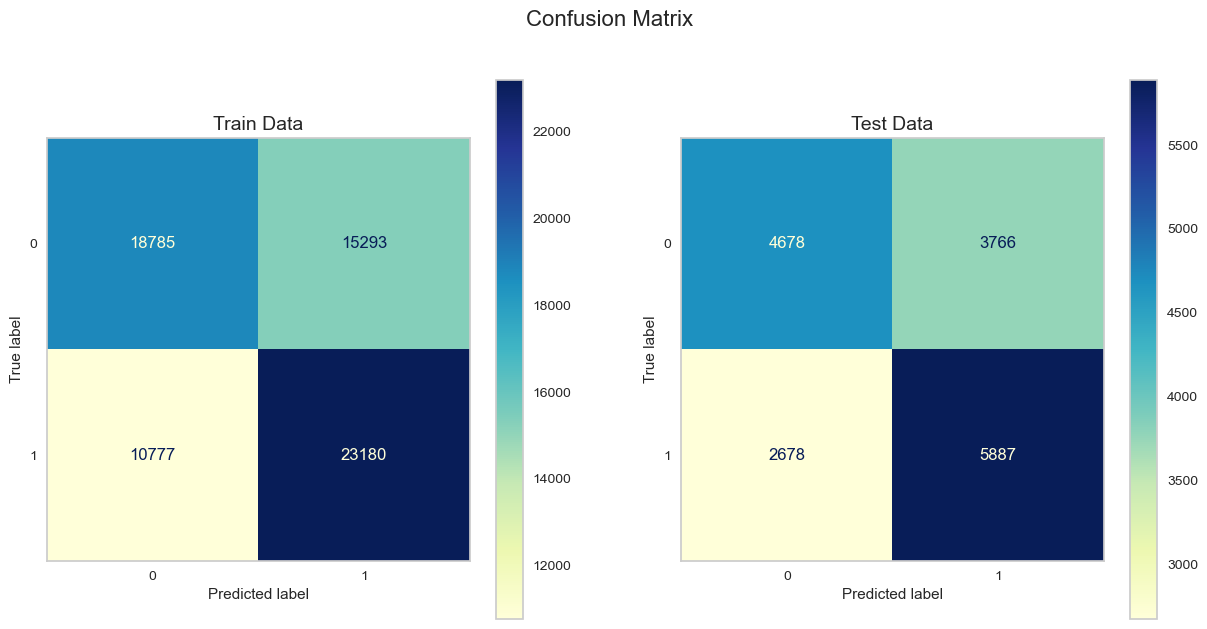

In [46]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=log_reg, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=log_reg, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# 2. DecisionTree Classifier :

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [48]:
y_pred_dt_train = dtree.predict(x_train_res)
y_pred_dt_test = dtree.predict(x_test_res)

**Model Evaluation :**

In [49]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_dt_train)

                    Training Report           
The accuracy of the Model is : 0.9983243918571324
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34078
           1       1.00      1.00      1.00     33957

    accuracy                           1.00     68035
   macro avg       1.00      1.00      1.00     68035
weighted avg       1.00      1.00      1.00     68035



In [50]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_dt_test)

               Testing Report                            
The accuracy of the Model is : 0.8530777823505203
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      8444
           1       0.85      0.87      0.86      8565

    accuracy                           0.85     17009
   macro avg       0.85      0.85      0.85     17009
weighted avg       0.85      0.85      0.85     17009



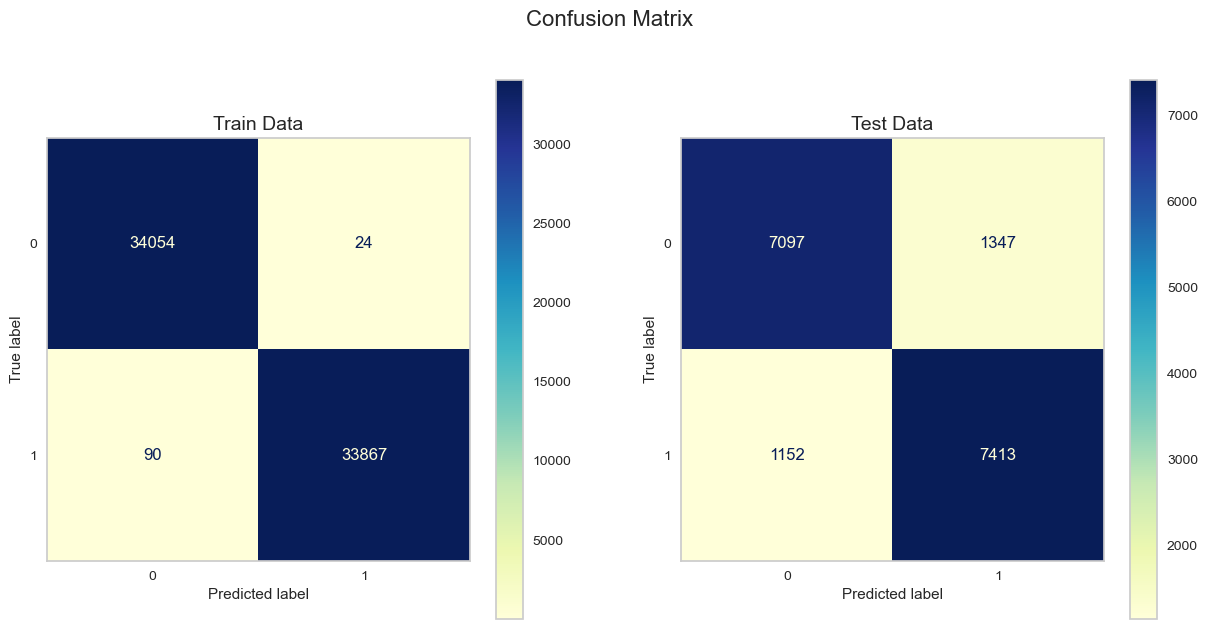

In [51]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtree, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtree, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# 3. AdaBoost Classifier :

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier(random_state = 45)
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train_res, y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45))

In [53]:
y_pred_ada_train = ada_class.predict(x_train_res)
y_pred_ada_test = ada_class.predict(x_test_res)

**Model Evaluation :**

In [54]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_ada_train)

                    Training Report           
The accuracy of the Model is : 0.9983243918571324
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34078
           1       1.00      1.00      1.00     33957

    accuracy                           1.00     68035
   macro avg       1.00      1.00      1.00     68035
weighted avg       1.00      1.00      1.00     68035



In [55]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_ada_test)

               Testing Report                            
The accuracy of the Model is : 0.8838850020577341
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8444
           1       0.90      0.87      0.88      8565

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



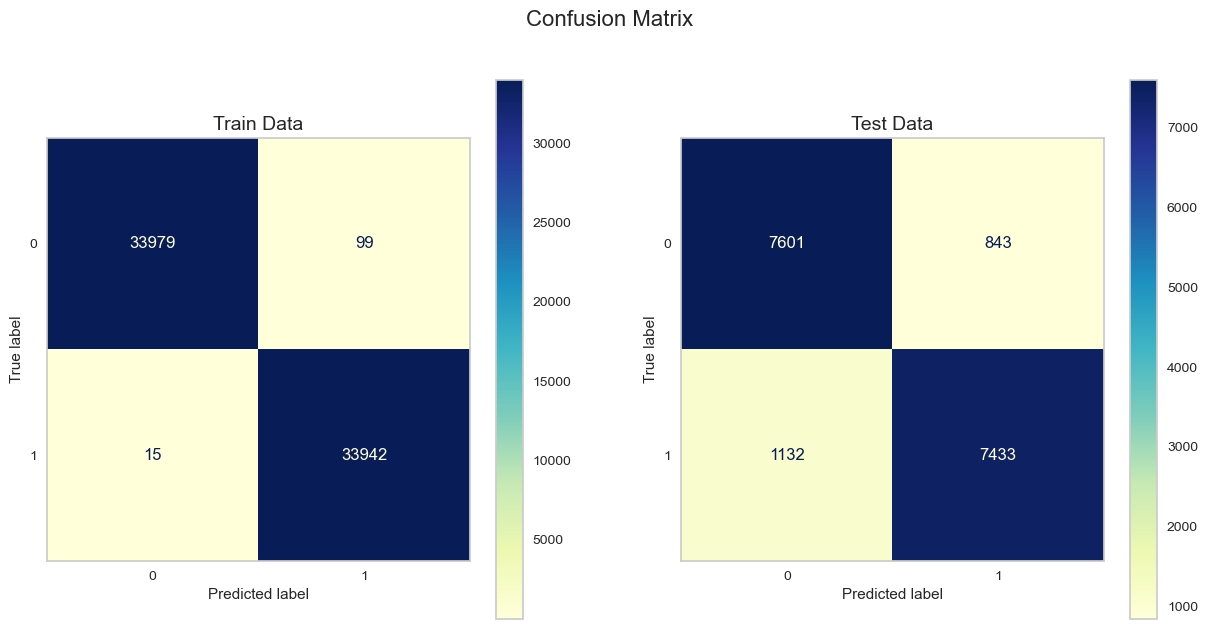

In [56]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=ada_class, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=ada_class, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# 4. Random Forest Classifier :

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier(random_state = 123)
clf_randF.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=123)

In [58]:
y_pred_rf_train = clf_randF.predict(x_train_res)
y_pred_rf_test = clf_randF.predict(x_test_res)

**Model Evaluation :**

In [59]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_rf_train)

                    Training Report           
The accuracy of the Model is : 0.9982802969060043
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34078
           1       1.00      1.00      1.00     33957

    accuracy                           1.00     68035
   macro avg       1.00      1.00      1.00     68035
weighted avg       1.00      1.00      1.00     68035



In [60]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_rf_test)

               Testing Report                            
The accuracy of the Model is : 0.894585219589629
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      8444
           1       0.93      0.85      0.89      8565

    accuracy                           0.89     17009
   macro avg       0.90      0.89      0.89     17009
weighted avg       0.90      0.89      0.89     17009



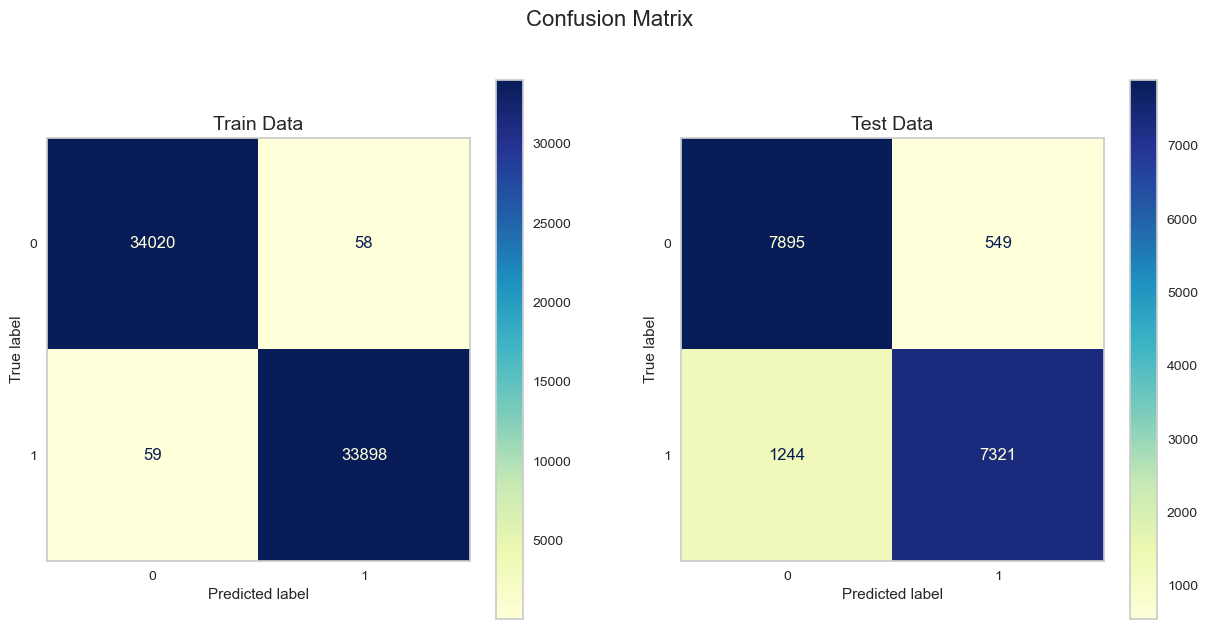

In [61]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf_randF, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_randF, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# 5. BaggingClassifier :

In [62]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier(random_state = 20)
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=20))

In [63]:
y_pred_bag_train = bag_clf.predict(x_train_res)
y_pred_bag_test = bag_clf.predict(x_test_res)

**Model Evaluation :**

In [64]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_bag_train)

                    Training Report           
The accuracy of the Model is : 0.9802013669434849
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     34078
           1       1.00      0.96      0.98     33957

    accuracy                           0.98     68035
   macro avg       0.98      0.98      0.98     68035
weighted avg       0.98      0.98      0.98     68035



In [65]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_bag_test)

               Testing Report                            
The accuracy of the Model is : 0.8947615968016932
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8444
           1       0.94      0.85      0.89      8565

    accuracy                           0.89     17009
   macro avg       0.90      0.90      0.89     17009
weighted avg       0.90      0.89      0.89     17009



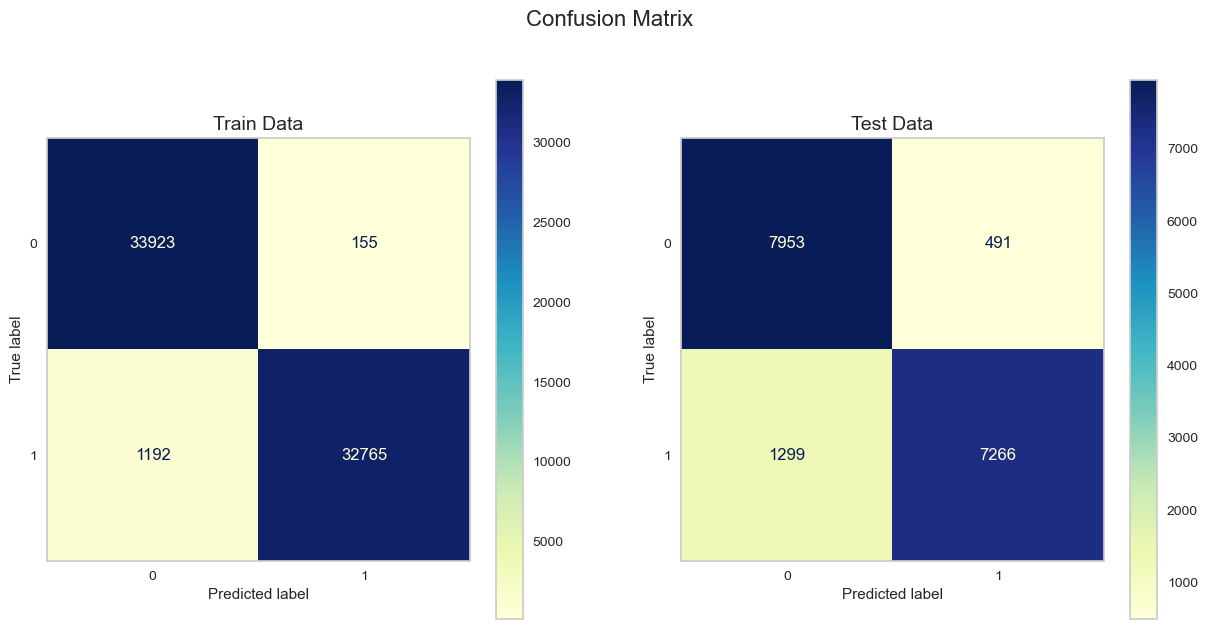

In [66]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=bag_clf, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=bag_clf, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# 6. XGBoost Classifier :

In [67]:
import xgboost

xg_boost = xgboost.XGBClassifier()
xg_boost.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [68]:
y_pred_xgb_train = xg_boost.predict(x_train_res)
y_pred_xgb_test = xg_boost.predict(x_test_res)

**Model Evaluation :**

In [69]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_xgb_train)

                    Training Report           
The accuracy of the Model is : 0.8991548467700449
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     34078
           1       0.99      0.81      0.89     33957

    accuracy                           0.90     68035
   macro avg       0.91      0.90      0.90     68035
weighted avg       0.91      0.90      0.90     68035



In [70]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_xgb_test)

               Testing Report                            
The accuracy of the Model is : 0.8879416779352107
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      8444
           1       0.98      0.79      0.88      8565

    accuracy                           0.89     17009
   macro avg       0.90      0.89      0.89     17009
weighted avg       0.90      0.89      0.89     17009



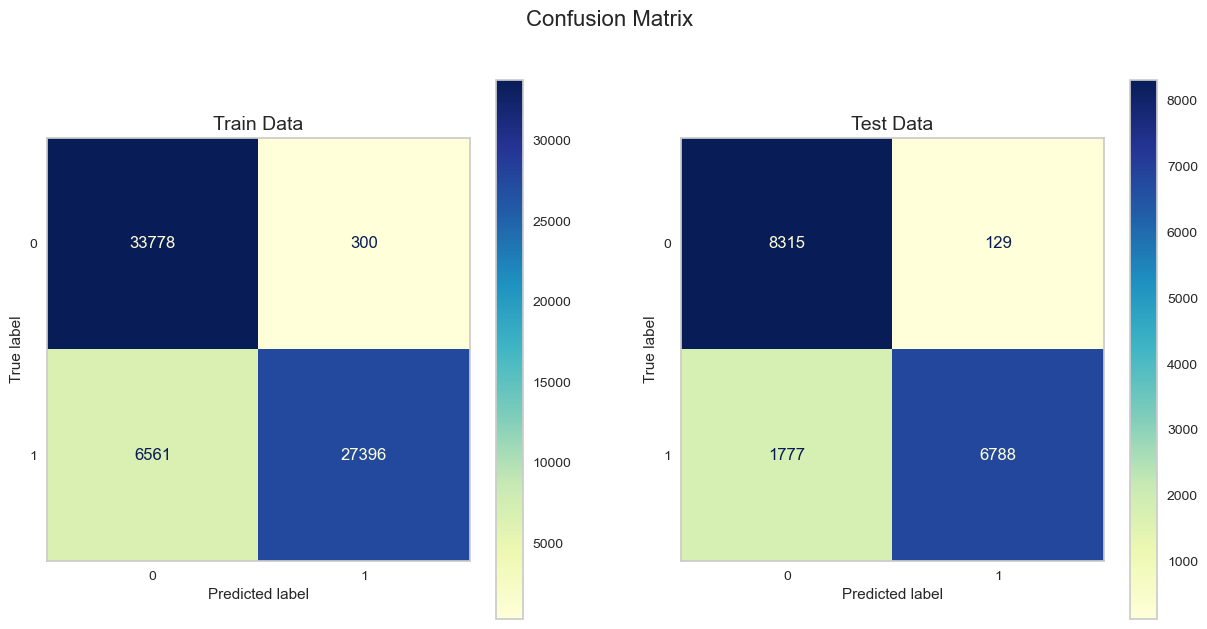

In [71]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=xg_boost, X=x_train_res, y_true=y_train_res, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=xg_boost, X=x_test_res, y_true=y_test_res, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

# Kfold Cross Validation :

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:
classifiers = []


classifiers.append(DecisionTreeClassifier())
classifiers.append(AdaBoostClassifier(base_estimator = ada_tree))
classifiers.append(RandomForestClassifier(random_state = 123))
classifiers.append(BaggingClassifier(base_estimator = clf_rand, n_estimators = 10))
classifiers.append(xgboost.XGBClassifier())

In [74]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train_res, y_train_res, scoring = 'accuracy', cv = 5))

In [75]:
cv_results

[array([0.84236055, 0.84515323, 0.84044977, 0.84993018, 0.84515323]),
 array([0.86602484, 0.87205115, 0.86440803, 0.88491218, 0.86837657]),
 array([0.88799882, 0.88425075, 0.8907915 , 0.88939516, 0.89152642]),
 array([0.88586757, 0.88197251, 0.88843977, 0.88880723, 0.88866025]),
 array([0.88307489, 0.88704343, 0.88682296, 0.89196737, 0.88755787])]

In [76]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [77]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Decision Tree Classifier', 'ADABoost Classifier','Random Forest Classifier', 'Bagging Classifier', 'XGBoost Classifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.888793,0.002573,Random Forest Classifier
1,0.887293,0.002828,XGBoost Classifier
2,0.886749,0.002621,Bagging Classifier
3,0.871155,0.007343,ADABoost Classifier
4,0.844609,0.003202,Decision Tree Classifier


# Hyperparameter Tuning :

# RandomForest Classifier :

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [84]:
param_grid = {
    'bootstrap': [True],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [50, 100, 150, 250, 400] }

In [86]:
grid_search = GridSearchCV(clf_randF, param_grid, cv = 6, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_res, y_train_res)

Fitting 6 folds for each of 120 candidates, totalling 720 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 250, 400]},
             verbose=2)

In [87]:
model_randf = grid_search.best_estimator_
model_randf

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=250, random_state=123)

In [88]:
clf_rfr = RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=250, random_state=123)
clf_rfr.fit(x_train_res, y_train_res)

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=250, random_state=123)

In [89]:
y_pred_randomF_train = clf_rfr.predict(x_train_res)
y_pred_randomF_test = clf_rfr.predict(x_test_res)

**Model Evaluation :**

In [90]:
print('                    Training Report           ')
modelEval(y_train_res, y_pred_randomF_train)

                    Training Report           
The accuracy of the Model is : 0.9499669287866539
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     34078
           1       0.99      0.91      0.95     33957

    accuracy                           0.95     68035
   macro avg       0.95      0.95      0.95     68035
weighted avg       0.95      0.95      0.95     68035



In [91]:
print('               Testing Report                            ')
modelEval(y_test_res, y_pred_randomF_test )

               Testing Report                            
The accuracy of the Model is : 0.890469751308131
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8444
           1       0.94      0.83      0.88      8565

    accuracy                           0.89     17009
   macro avg       0.90      0.89      0.89     17009
weighted avg       0.90      0.89      0.89     17009

